In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_csv("/content/Sportcars_Raw_Dataset.csv")
df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Top Speed (mph),Category_Grade,Exclusivity,Days Sales of Inventory (DSI),Price
0,Porsche,911 Carrera GTS,2023,2.9,444.0,442.0,3.7,174.0,C,Normal,38,94500
1,LamBkrgHini,Huracan,2024,3.0,503.0,479.0,3.8,180.0,B,Normal,42,97800
2,FeDrWrI,488 GTB,2023,3.0,379.0,331.0,4.0,182.0,C,Normal,51,"114400,0"
3,Audi,R8,2024,5.0,500.0,418.0,4.1,168.0,C,Normal,35,"71500,0"
4,McLaren,720S,2024,4.0,621.0,NaN,3.3,190.0,A,NOrmaR,55,128800
...,...,...,...,...,...,...,...,...,...,...,...,...
693,ChCvRoOet,Camaro ZL1,2023,5.0,1600.0,1106.0,2.6,305.0,S,Super rare,184,2143000
694,Dodge,Challenger SRT Hellcat,2023,6.0,720.0,738.0,3.0,230.0,S,Super rare,174,2343000
695,Ford,GT,2023,6.5,829.0,514.0,2.8,211.0,S,STper rARe,199,"2043000,0"
696,Lexus,LC 500,2021,NaN,808.0,531.0,2.8,217.0,S,SupER rare,151,2493000


3.1. Tổng quan bộ dữ liệu

In [ ]:
print("Shape:", df.shape)

Shape: (698, 12)


In [ ]:
print("\nTên các cột:", list(df.columns))


Tên các cột: ['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Top Speed (mph)', 'Category_Grade', 'Exclusivity', 'Days Sales of Inventory (DSI)', 'Price']


In [ ]:
print("\n--- 10 dòng dữ liệu đầu tiên ---")
df.head(86)


--- 10 dòng dữ liệu đầu tiên ---


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Top Speed (mph),Category_Grade,Exclusivity,Days Sales of Inventory (DSI),Price
0,Porsche,911 Carrera GTS,2023,2.9,444.0,442.0,3.7,174.0,C,Normal,38,94500
1,LamBkrgHini,Huracan,2024,3.0,503.0,479.0,3.8,180.0,B,Normal,42,97800
2,FeDrWrI,488 GTB,2023,3.0,379.0,331.0,4.0,182.0,C,Normal,51,"114400,0"
3,Audi,R8,2024,5.0,500.0,418.0,4.1,168.0,C,Normal,35,"71500,0"
4,McLaren,720S,2024,4.0,621.0,NaN,3.3,190.0,A,NOrmaR,55,128800
...,...,...,...,...,...,...,...,...,...,...,...,...
81,Porsche,718 Cayman,2024,3.0,NaN,390.0,3.6,191.0,B,Normal,46,133000
82,wCura,NSX,2023,4.0,591.0,NaN,3.5,190.0,B,Normal,51,124200
83,Aston Martin,Vantage,2024,4.4,617.0,553.0,NaN,190.0,A,Normal,51,114800
84,BeUtlvy,Continental GT,2024,6.5,1001.0,535.0,2.5,217.0,S,REre,112,"610500,0"


In [ ]:
print("\n--- dtypes before cleaning ---")
print(df.dtypes)


--- dtypes before cleaning ---
Car Make                          object
Car Model                         object
Year                               int64
Engine Size (L)                  float64
Horsepower                       float64
Torque (lb-ft)                   float64
0-60 MPH Time (seconds)          float64
Top Speed (mph)                  float64
Category_Grade                    object
Exclusivity                       object
Days Sales of Inventory (DSI)      int64
Price                             object
dtype: object


In [ ]:
print("\n--- Null counts ---")
print(df.isna().sum())


--- Null counts ---
Car Make                          0
Car Model                         0
Year                              0
Engine Size (L)                  50
Horsepower                       40
Torque (lb-ft)                   56
0-60 MPH Time (seconds)          33
Top Speed (mph)                  34
Category_Grade                    0
Exclusivity                       0
Days Sales of Inventory (DSI)     0
Price                             0
dtype: int64


In [ ]:
print("\n--- Random sample ---")
df.sample(min(10, len(df)), random_state=42)


--- Random sample ---


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Top Speed (mph),Category_Grade,Exclusivity,Days Sales of Inventory (DSI),Price
158,Bugatti,Chiron,2023,4.0,612.0,465.0,3.1,203.0,A,Rare,82,"511300,0"
499,Bugatti,Chiron,2021,5.0,1500.0,1475.0,2.8,255.0,S,Super rare,196,"1615000,0"
396,LEXuc,LC 500,2024,2.5,301.0,281.0,4.9,170.0,C,Normal,58,92700
155,Acura,NSX,2023,4.0,NaN,309.0,4.2,187.0,B,NormaE,53,105000
321,Aston Martin,DB11,2023,4.0,414.0,NaN,4.2,187.0,B,Normal,63,105500
212,Porsche,Panamera Turbo S,2019,8.0,1479.0,1180.0,2.5,261.0,S,SupEr rarC,140,3000000
234,LoMqS,Evora GT,2023,2.9,455.0,442.0,3.8,174.0,B,NormTL,48,"125800,0"
289,Porsche,718 Cayman GT4,2023,5.0,1600.0,1106.0,2.6,305.0,S,Super rare,179,"2190000,0"
300,Tesla,Model S,2022,8.0,1479.0,1180.0,2.5,NaN,S,Super rare,146,2955000
356,Aston Martin,Vantage,2023,3.0,432.0,386.0,4.4,174.0,B,Normal,68,103400


In [ ]:
# Xem các giá trị nhiễu
for col in df.select_dtypes(include="object").columns:
    print(f"\n== {col} ==")
    print(df[col].value_counts(dropna=False).head(5))


== Car Make ==
Car Make
Porsche         47
Audi            35
Lamborghini     35
McLaren         31
Aston Martin    29
Name: count, dtype: int64

== Car Model ==
Car Model
GT                35
Camaro ZL1        23
Continental GT    19
Evora GT          19
GranTurismo       18
Name: count, dtype: int64

== Category_Grade ==
Category_Grade
S    241
B    178
A    177
C    102
Name: count, dtype: int64

== Exclusivity ==
Exclusivity
Normal        259
Rare          145
Super rare     85
  NOrmal        2
  NoRmJl        1
Name: count, dtype: int64

== Price ==
Price
104100      4
130100      4
138100,0    3
115300      3
103400      3
Name: count, dtype: int64


In [ ]:
# Spot numeric-like text columns
obj_cols = df.select_dtypes(include="object").columns
suspect_numeric_like = []
for col in obj_cols:
    sample = df[col].dropna().astype(str).head(50)
    if len(sample) and sample.str.contains(r"[\d,.\-]+", regex=True).mean() > 0.6:
        suspect_numeric_like.append(col)
print("\nSuspect numeric-like object columns:", suspect_numeric_like)


Suspect numeric-like object columns: ['Price']


3.2. Chuẩn hóa dữ liệu

In [ ]:
# Chuẩn hoá các giá trị của cột Car Make
from nltk.metrics.distance import edit_distance

list_carmakes = [
    'Porsche','Lamborghini','Ferrari','Audi','McLaren','BMW','Mercedes-Benz','Chevrolet','Ford','Nissan',
    'Aston Martin','Bugatti','Dodge','Jaguar','Koenigsegg','Lexus','Lotus','Maserati','Alfa Romeo','Ariel',
    'Bentley','Mercedes-AMG','Pagani','Polestar','Rimac','Acura','Mazda','Rolls-Royce','Tesla','Toyota',
    'W Motors','Shelby','TVR','Subaru','Pininfarina','Kia','Alpine','Ultima'
]

cm_keys = [re.sub(r'[^a-z]', '', m.lower()) for m in list_carmakes]
cm_map  = dict(zip(cm_keys, list_carmakes))

_norm = lambda s: re.sub(r'[^a-z]', '', re.sub(r'(.)\1+', r'\1', str(s).lower()))

_src = df["Car Make"]
k = _src.map(_norm)                                      # key đã chuẩn hoá
out = k.map(cm_map)                                      # (a) exact map
mask = out.isna()
best = k[mask].apply(lambda x: min(cm_keys, key=lambda c: edit_distance(x, c)) if x else None)
dist = k[mask].combine(best, lambda a,b: edit_distance(a, b) if (a and b) else 999)
out.loc[mask] = best.where(dist <= 4).map(cm_map)        # (b) approx nếu khoảng cách ≤ 4
df["Car Make"] = out.fillna(                             # (c) fallback: giữ nguyên nhưng “làm đẹp”
    _src.astype(str).str.replace(r"\s+"," ", regex=True).str.strip().str.title()
)

In [ ]:
# Chuẩn hoá các giá trị của cột Exclusivity

# Tập nhãn chuẩn
exclusivity_list = ["Normal", "Rare", "Super rare"]

# Tạo key chuẩn (lower + bỏ ký tự ngoài a-z)
ex_keys = [re.sub(r'[^a-z]', '', e.lower()) for e in exclusivity_list]
ex_map  = dict(zip(ex_keys, exclusivity_list))

# Chuẩn hoá dữ liệu nguồn
_src = df["Exclusivity"]
k = _src.map(_norm)
out = k.map(ex_map)
mask = out.isna()
best = k[mask].apply(lambda x: min(ex_keys, key=lambda c: edit_distance(x, c)) if x else None)
dist = k[mask].combine(best, lambda a,b: edit_distance(a, b) if (a and b) else 999)
out.loc[mask] = best.where(dist <= 4).map(ex_map)
df["Exclusivity"] = out.fillna(
    _src.astype(str).str.replace(r"\s+"," ", regex=True).str.strip().str.title()
)

In [ ]:
# Chuẩn hoá các giá trị của cột Price - các giá trị price có dấu , làm hiểu sai kiểu dữ liệu thành string

_p = (df["Price"]
      .astype(str)
      .str.replace(r',.*', '', regex=True)
      .replace({'': np.nan}))

df["Price"] = pd.to_numeric(_p, errors='coerce')


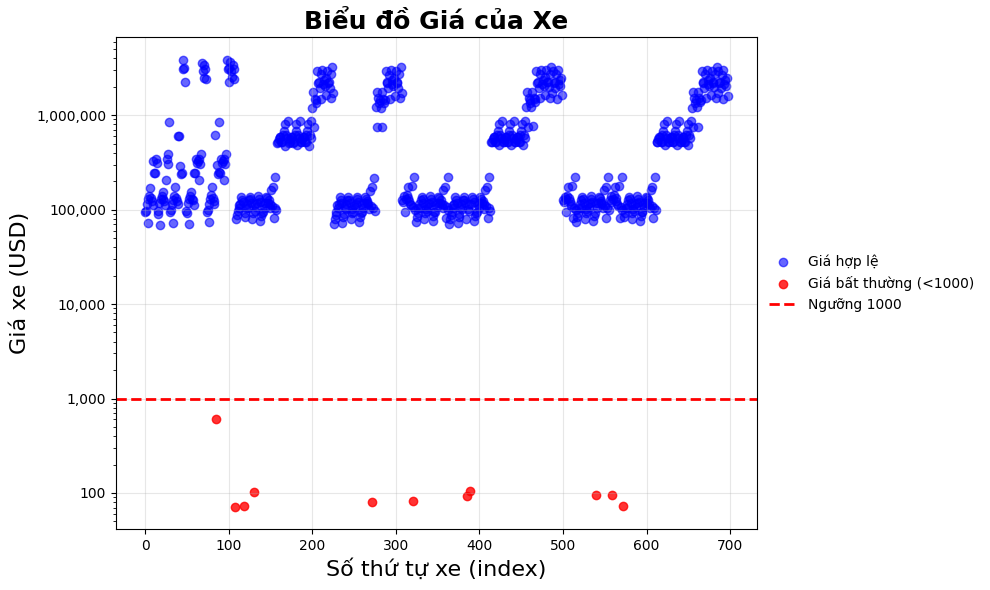

In [ ]:
#Chuẩn hóa các giá trị cột Price có giá quá thấp do nhập dữ liệu sai đơn vị giữa USD và nghìn USD
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# Giả sử cột giá tên là 'Price'
normal_prices = df[df['Price'] >= 1000]
abnormal_prices = df[df['Price'] < 1000]

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.scatter(normal_prices.index, normal_prices['Price'], color='blue', label='Giá hợp lệ', alpha=0.6)
plt.scatter(abnormal_prices.index, abnormal_prices['Price'], color='red', label='Giá bất thường (<1000)', alpha=0.8)

# Đường ngưỡng 1000
plt.axhline(y=1000, color='red', linestyle='--', linewidth=2, label='Ngưỡng 1000')

# Thang log
plt.yscale('log')

# Định dạng trục y
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Tiêu đề và nhãn
plt.title('Biểu đồ Giá của Xe', fontsize=18, fontweight='bold')
plt.xlabel('Số thứ tự xe (index)', fontsize=16)
plt.ylabel('Giá xe (USD)', fontsize=16)

# Đưa legend ra ngoài bên phải
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Một số hãng xe công bố giá bán theo đơn vị là 1000 USD cho nên dẫn đến một vài giá trị của Price trong bộ dữ liệu có giá trị dưới 1000 USD. Nên là biểu đồ trên đã giúp cho phát hiện được các điểm dữ liệu ấy

In [ ]:
df.loc[df['Price'] < 1000, 'Price'] = df.loc[df['Price'] < 1000, 'Price'] * 1000

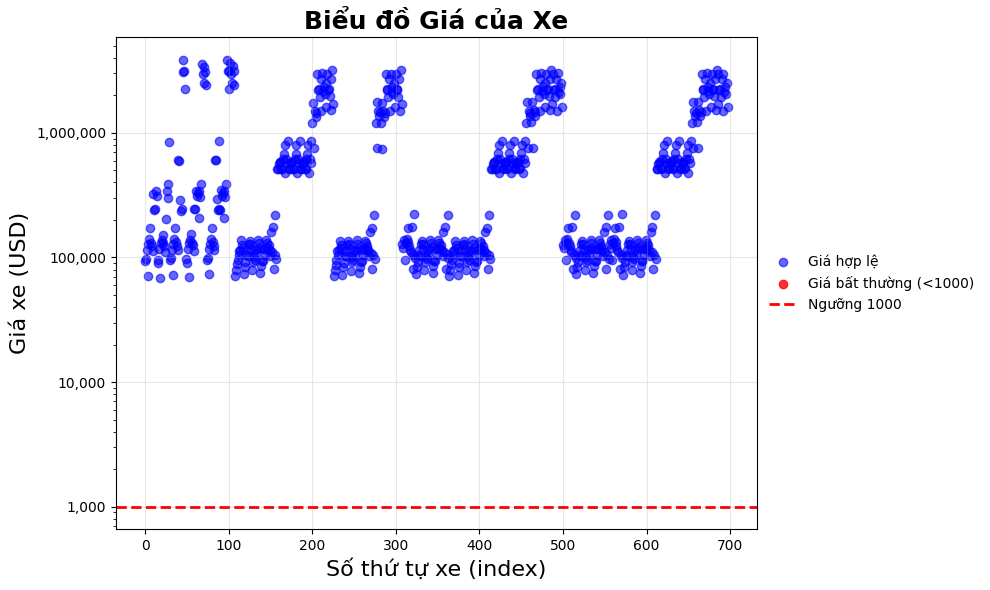

In [ ]:
import matplotlib.ticker as mtick


# Giả sử cột giá tên là 'Price'
normal_prices = df[df['Price'] >= 1000]
abnormal_prices = df[df['Price'] < 1000]

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.scatter(normal_prices.index, normal_prices['Price'], color='blue', label='Giá hợp lệ', alpha=0.6)
plt.scatter(abnormal_prices.index, abnormal_prices['Price'], color='red', label='Giá bất thường (<1000)', alpha=0.8)

# Đường ngưỡng 1000
plt.axhline(y=1000, color='red', linestyle='--', linewidth=2, label='Ngưỡng 1000')

# Hiển thị đầy đủ tất cả giá, nhưng cho đường đỏ nằm giữa bằng cách mở rộng tỷ lệ log
plt.yscale('log')  # Dùng thang log giúp nhìn rõ cả giá thấp và cao

# Định dạng trục y theo hàng nghìn
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Biểu đồ Giá của Xe', fontsize=18, fontweight = 'bold')
plt.xlabel('Số thứ tự xe (index)', fontsize = 16)
plt.ylabel('Giá xe (USD)', fontsize = 16)
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Kiểm tra sau khi xử lý
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Car Make                       698 non-null    object 
 1   Car Model                      698 non-null    object 
 2   Year                           698 non-null    int64  
 3   Engine Size (L)                648 non-null    float64
 4   Horsepower                     658 non-null    float64
 5   Torque (lb-ft)                 642 non-null    float64
 6   0-60 MPH Time (seconds)        665 non-null    float64
 7   Top Speed (mph)                664 non-null    float64
 8   Category_Grade                 698 non-null    object 
 9   Exclusivity                    698 non-null    object 
 10  Days Sales of Inventory (DSI)  698 non-null    int64  
 11  Price                          698 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 6

3.3 Xử lý dữ liệu bị thiếu

/tmp/ipython-input-2238031676.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category_Grade', y=col, data=df,
/tmp/ipython-input-2238031676.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category_Grade', y=col, data=df,
/tmp/ipython-input-2238031676.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category_Grade', y=col, data=df,
/tmp/ipython-input-2238031676.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend

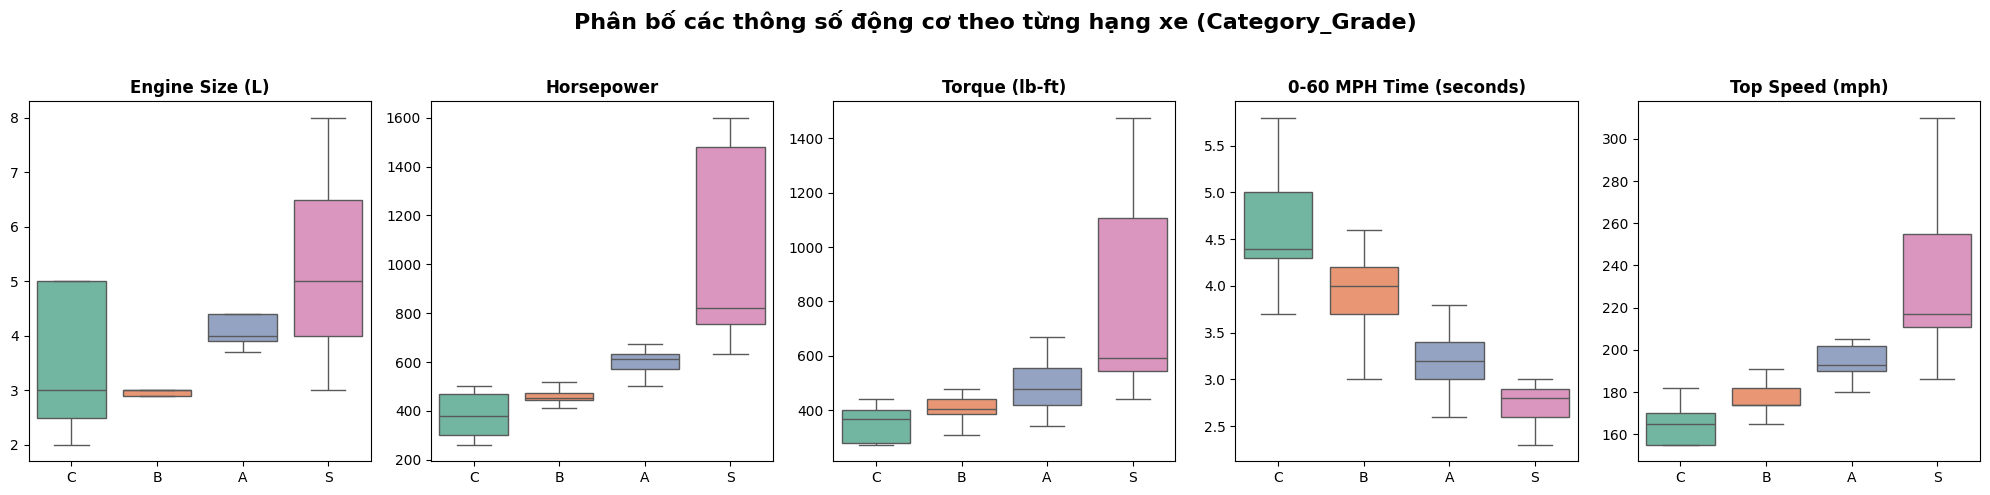

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các biến cần vẽ
cols = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)',
        '0-60 MPH Time (seconds)', 'Top Speed (mph)']

plt.figure(figsize=(20, 5))  # Mở rộng chiều ngang để dễ nhìn

for i, col in enumerate(cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(x='Category_Grade', y=col, data=df,
                palette='Set2', showfliers=False)  # bỏ outlier nếu muốn gọn hơn
    plt.title(col, fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle('Phân bố các thông số động cơ theo từng hạng xe (Category_Grade)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # tránh đè lên tiêu đề
plt.show()


Trong thực tế sản xuất và thị trường:
Các dòng xe thuộc cùng hạng (grade) được thiết kế với cấu hình tương tự nhau.
Về mặt trực quan biểu đồ: Category_Grade có tương quan mạnh với các biến kỹ thuật
-> Có thể fill null các cột thông số động cơ theo trung bình từng Category_Grade



In [ ]:
# Xử lý dữ liệu số bị thiếu
cols = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Top Speed (mph)']

# Điền giá trị NaN theo trung bình của Category_Grade
for col in cols:
    df[col] = df.groupby('Category_Grade')[col].transform(lambda x: x.fillna(x.mean()))


3.4 Tạo biến dẫn xuất đo lường hiệu năng xe

In [ ]:
import numpy as np
df['Performance_Index'] = np.round(df['Horsepower'] / df['Price'], 6)

In [ ]:
df['Performance_Index']

,Performance_Index
0,0.004698
1,0.005143
2,0.003313
3,0.006993
4,0.004821
...,...
693,0.000747
694,0.000307
695,0.000406
696,0.000324


3.6. EDA

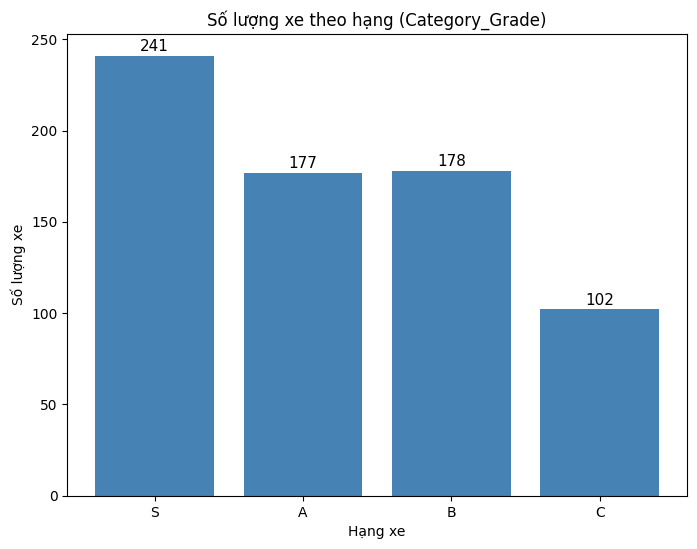

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize': (8, 6)})
grade_counts = df["Category_Grade"].value_counts()
order = ["S", "A", "B", "C"]
grade_counts = grade_counts.reindex(order).fillna(0)  # nếu thiếu hạng nào thì gán 0

plt.bar(grade_counts.index.astype(str), grade_counts.values, color='steelblue')
for i, value in enumerate(grade_counts.values):
    plt.text(i, value + 1, str(int(value)), ha='center', va='bottom', fontsize=11)
plt.title("Số lượng xe theo hạng (Category_Grade)")
plt.xlabel("Hạng xe")
plt.ylabel("Số lượng xe")
plt.grid(False)
plt.show()


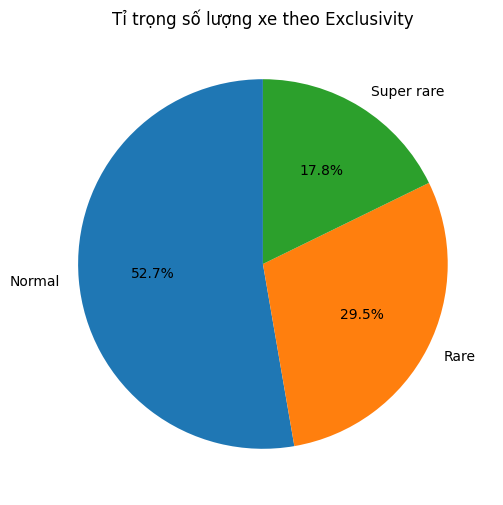

In [ ]:
# 2) Pie: counts by Exclusivity
ex_counts = df["Exclusivity"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(ex_counts.values, labels=ex_counts.index.astype(str), autopct="%.1f%%", startangle=90)
plt.title("Tỉ trọng số lượng xe theo Exclusivity")
plt.show()

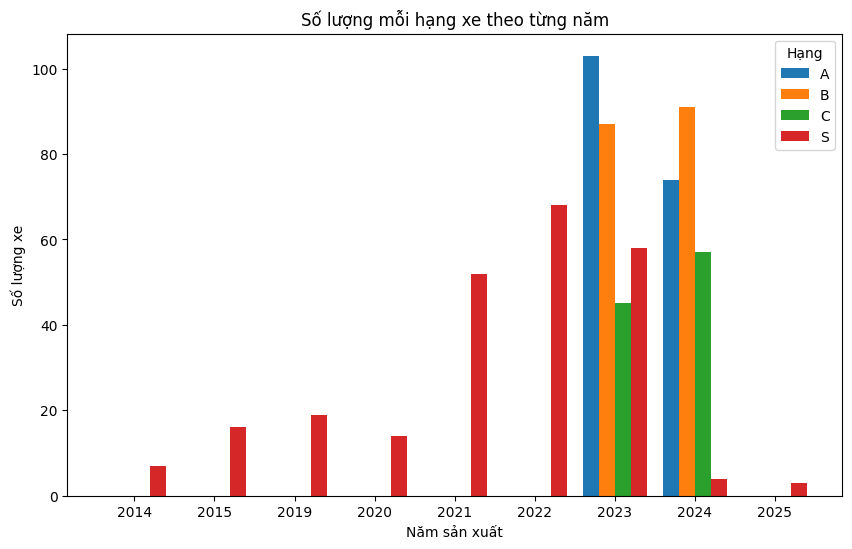

In [ ]:
# 3) Bar: counts per year per grade (grouped)
pivot_counts = df.pivot_table(index="Year", columns=df["Category_Grade"], values=df.columns[0], aggfunc="count", fill_value=0)
years = pivot_counts.index.astype(int)
grades = list(pivot_counts.columns)
x = np.arange(len(years))
width = 0.8 / max(len(grades), 1)

plt.figure(figsize=(10, 6))
for i, g in enumerate(grades):
    plt.bar(x + i*width, pivot_counts[g].values, width=width, label=str(g))
plt.xticks(x + (len(grades)-1)*width/2, years)
plt.xlabel("Năm sản xuất"); plt.ylabel("Số lượng xe")
plt.title("Số lượng mỗi hạng xe theo từng năm")
plt.legend(title="Hạng")
plt.grid(False)
plt.show()

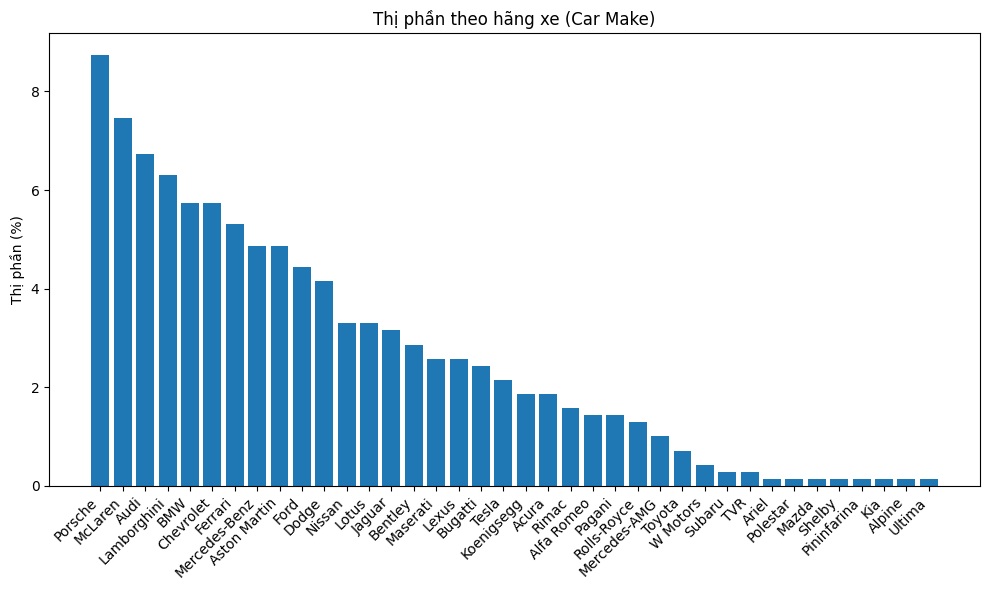

Car Make chiếm thị phần lớn nhất: Porsche (8.7%)


In [ ]:
# 4) Market share by Car Make (within dataset)
make_counts = df["Car Make"].value_counts()
make_share = (make_counts / make_counts.sum()) * 100
plt.figure(figsize=(10, 6))
plt.bar(make_share.index.astype(str), make_share.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Thị phần (%)")
plt.title("Thị phần theo hãng xe (Car Make)")
plt.tight_layout()
plt.grid(False)
plt.show()

top_make = make_share.idxmax()
top_share = make_share.max()
print(f"Car Make chiếm thị phần lớn nhất: {top_make} ({top_share:.1f}%)")

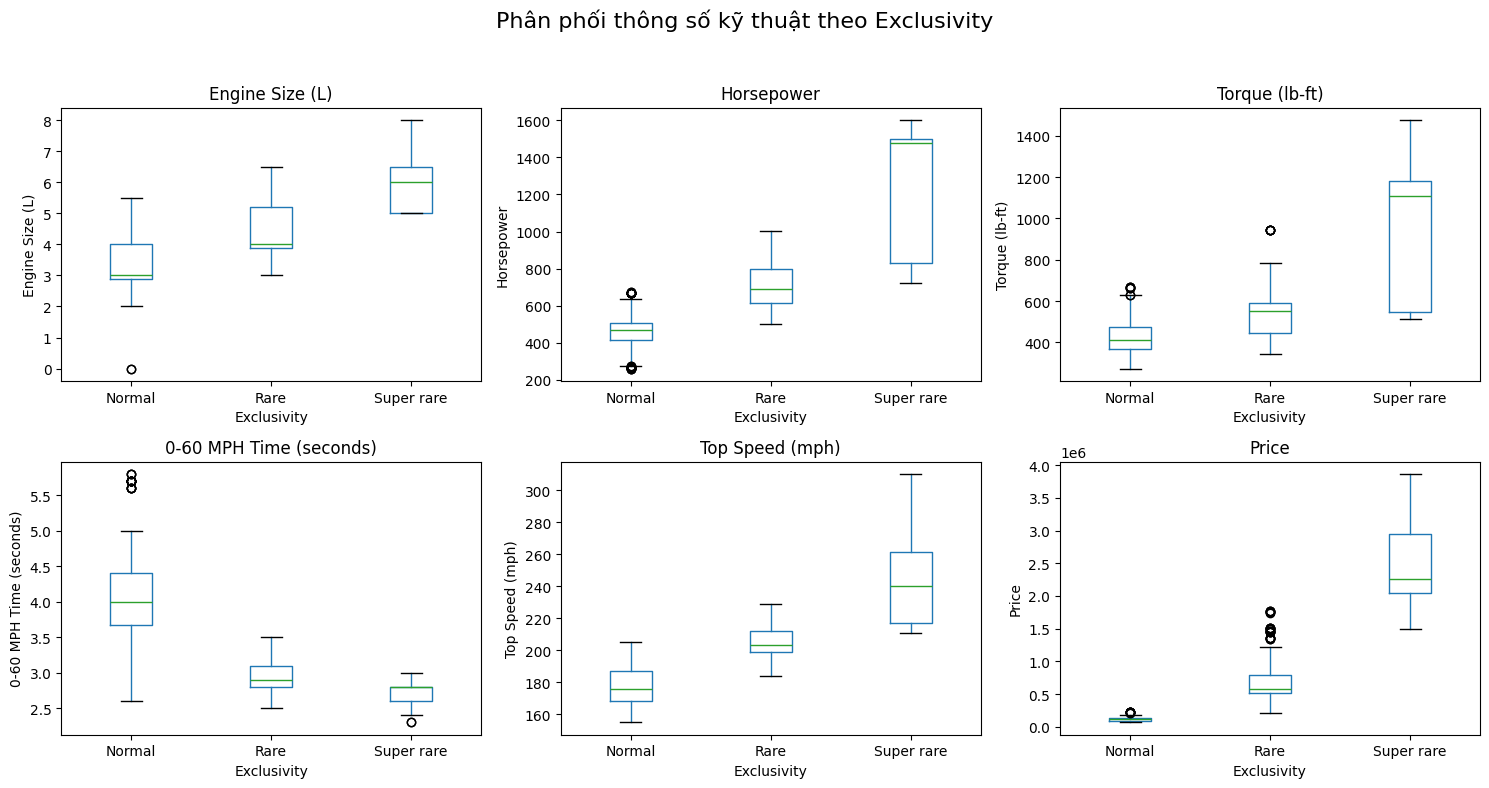

In [ ]:
tech_cols = [
    "Engine Size (L)",
    "Horsepower",
    "Torque (lb-ft)",
    "0-60 MPH Time (seconds)",
    "Top Speed (mph)",
    "Price",
]

# Xác định số hàng và cột cho subplot
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Phân phối thông số kỹ thuật theo Exclusivity", fontsize=14)

# Duyệt qua các thông số và vẽ từng boxplot
for i, col in enumerate(tech_cols):
    if col not in df.columns:
        continue
    r, c = divmod(i, 3)
    df.boxplot(column=col, by="Exclusivity", grid=False, ax=axes[r, c])
    axes[r, c].set_title(col)
    axes[r, c].set_xlabel("Exclusivity")
    axes[r, c].set_ylabel(col)

# Xoá tiêu đề mặc định "Boxplot grouped by ..."
plt.suptitle("Phân phối thông số kỹ thuật theo Exclusivity", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.grid(False)
plt.show()

3.4 Tạo biến dẫn xuất đo lường hiệu năng xe

In [ ]:
import numpy as np
df['Performance_Index'] = np.round(df['Horsepower'] / df['Price'], 6)

In [ ]:
df['Performance_Index']

,Performance_Index
0,0.004698
1,0.005143
2,0.003313
3,0.006993
4,0.004821
...,...
693,0.000747
694,0.000307
695,0.000406
696,0.000324


Kiểm định

Góc nhìn sản xuất:
Giả thuyết 1: Muốn nâng hạng xe thì nên tập trung nâng thông số kỵ thuật xe hơn là tăng độ hiếm (Dùng Spearman)
Giả thuyết 2: Muốn nâng giá xe thì nên tập trung nâng độ hiếm hơn là nâng thông số kỹ thuật (Dùng Spearman)


In [ ]:
import pandas as pd
from scipy.stats import spearmanr, kruskal

# Mapping
grade_map = {'C': 1, 'B': 2, 'A': 3,'S': 4}
exclusive_map = {'Normal': 1, 'Rare': 2, 'Super rare': 3}

df['Grade_num'] = df['Category_Grade'].map(grade_map)
df['Exclusivity_num'] = df['Exclusivity'].map(exclusive_map)
print(df[['Category_Grade', 'Grade_num', 'Exclusivity', 'Exclusivity_num']].head())

# Tương quan Spearman
cols = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)',
        '0-60 MPH Time (seconds)', 'Top Speed (mph)']
print("=== TƯƠNG QUAN SPEARMAN: Hạng xe và Thông số kỹ thuật ===")
for c in cols:
    rho, p = spearmanr(df['Grade_num'], df[c], nan_policy='omit')
    print(f"{c:<25} rho = {rho:.3f}, p = {p:.5f}")
print("\n=== TƯƠNG QUAN SPEARMAN: Hạng xe và Độ hiếm ===")
rho_ex, p_ex = spearmanr(df['Grade_num'], df['Exclusivity_num'], nan_policy='omit')
print(f"Exclusivity: rho = {rho_ex:.3f}, p = {p_ex:.5f}")


  Category_Grade  Grade_num Exclusivity  Exclusivity_num
0              C          1      Normal                1
1              B          2      Normal                1
2              C          1      Normal                1
3              C          1      Normal                1
4              A          3      Normal                1
=== TƯƠNG QUAN SPEARMAN: Hạng xe và Thông số kỹ thuật ===
Engine Size (L)           rho = 0.677, p = 0.00000
Horsepower                rho = 0.925, p = 0.00000
Torque (lb-ft)            rho = 0.821, p = 0.00000
0-60 MPH Time (seconds)   rho = -0.898, p = 0.00000
Top Speed (mph)           rho = 0.913, p = 0.00000

=== TƯƠNG QUAN SPEARMAN: Hạng xe và Độ hiếm ===
Exclusivity: rho = 0.833, p = 0.00000


In [ ]:
import pandas as pd
from scipy.stats import spearmanr
# Tương quan Spearman
results = []
for c in cols:
    rho, _ = spearmanr(df['Grade_num'], df[c], nan_policy='omit')
    results.append((c, rho))

rho_ex, _ = spearmanr(df['Grade_num'], df['Exclusivity_num'], nan_policy='omit')
results.append(('Exclusivity', rho_ex))

corr_table = pd.DataFrame(results, columns=['Biến', 'Hệ số tương quan (ρ)'])
print("\n=== BẢNG TƯƠNG QUAN SPEARMAN VỚI HẠNG XE ===")
print(corr_table.to_string(index=False))



=== BẢNG TƯƠNG QUAN SPEARMAN VỚI HẠNG XE ===
                   Biến  Hệ số tương quan (ρ)
        Engine Size (L)              0.676609
             Horsepower              0.924671
         Torque (lb-ft)              0.820551
0-60 MPH Time (seconds)             -0.897639
        Top Speed (mph)              0.912802
            Exclusivity              0.833341


In [ ]:
import pandas as pd
from scipy.stats import spearmanr
# Tương quan Spearman
rho_values = []
for c in cols:
    rho, _ = spearmanr(df['Grade_num'], df[c], nan_policy='omit')
    rho_values.append(abs(rho))

# Trung bình nhóm thông số kỹ thuật
mean_rho_specs = sum(rho_values) / len(rho_values)

# Tương quan hạng xe - độ hiếm (|ρ|)
rho_ex, _ = spearmanr(df['Grade_num'], df['Exclusivity_num'], nan_policy='omit')
rho_ex = abs(rho_ex)

result = pd.DataFrame({
    'Nhóm biến': ['Thông số kỹ thuật (trung bình |ρ|)', 'Độ hiếm (Exclusivity)'],
    'Hệ số tương quan (|ρ|)': [mean_rho_specs, rho_ex]
})

print("=== SO SÁNH TƯƠNG QUAN TRUNG BÌNH (TRỊ TUYỆT ĐỐI) ===")
print(result.to_string(index=False))


=== SO SÁNH TƯƠNG QUAN TRUNG BÌNH (TRỊ TUYỆT ĐỐI) ===
                         Nhóm biến  Hệ số tương quan (|ρ|)
Thông số kỹ thuật (trung bình |ρ|)                0.846455
             Độ hiếm (Exclusivity)                0.833341


/tmp/ipython-input-1384761593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category_Grade', y=var, data=df, palette='Set2')
/tmp/ipython-input-1384761593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category_Grade', y=var, data=df, palette='Set2')
/tmp/ipython-input-1384761593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category_Grade', y=var, data=df, palette='Set2')
/tmp/ipython-input-1384761593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

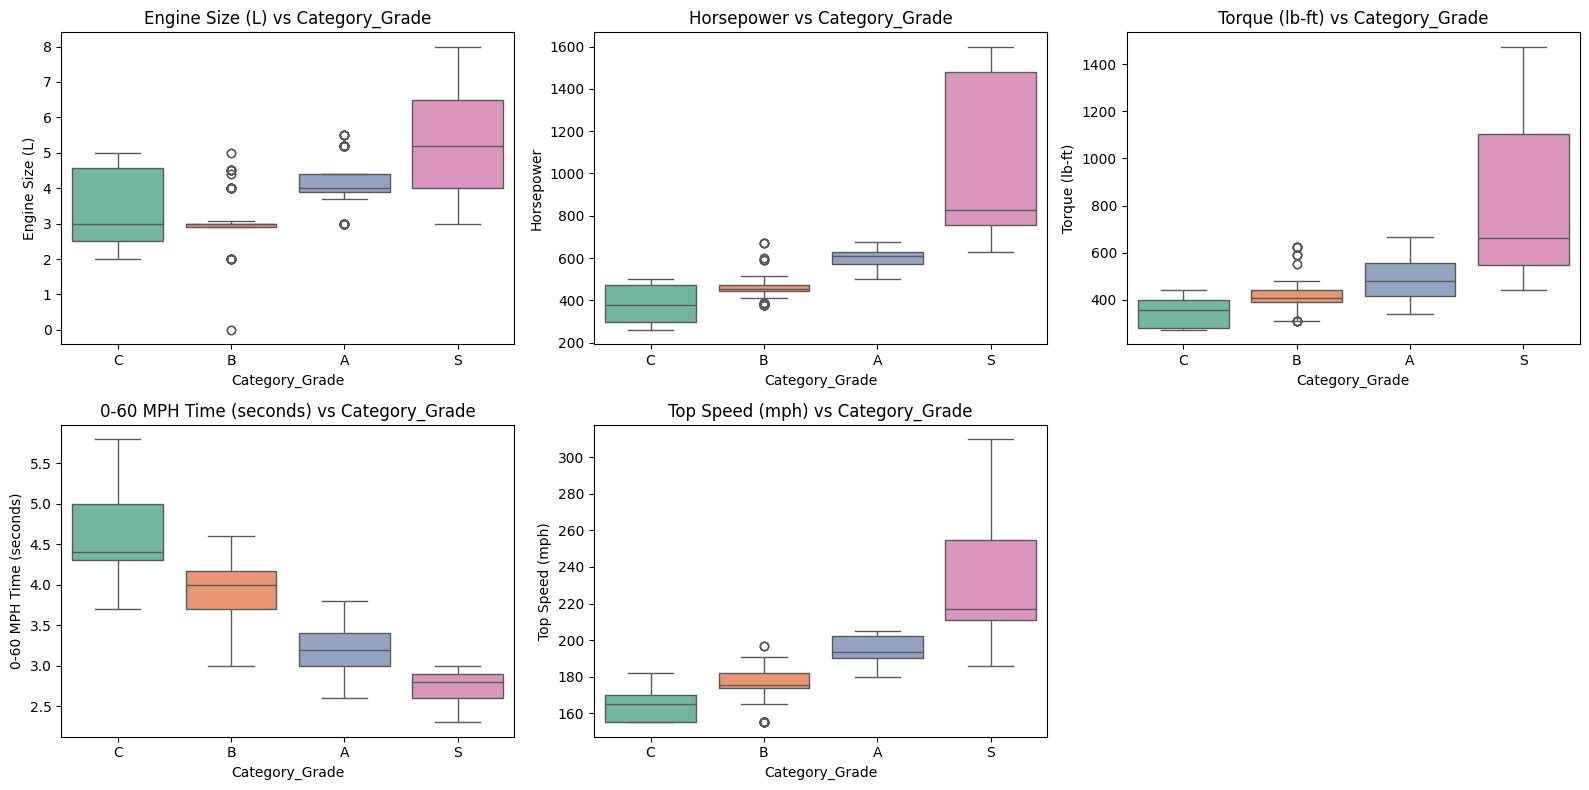

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

engine_vars = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)',
        '0-60 MPH Time (seconds)', 'Top Speed (mph)']
plt.figure(figsize=(16, 8))
for i, var in enumerate(engine_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Category_Grade', y=var, data=df, palette='Set2')
    plt.title(f"{var} vs Category_Grade")
    plt.xlabel("Category_Grade")
    plt.ylabel(var)

plt.tight_layout()
plt.show()


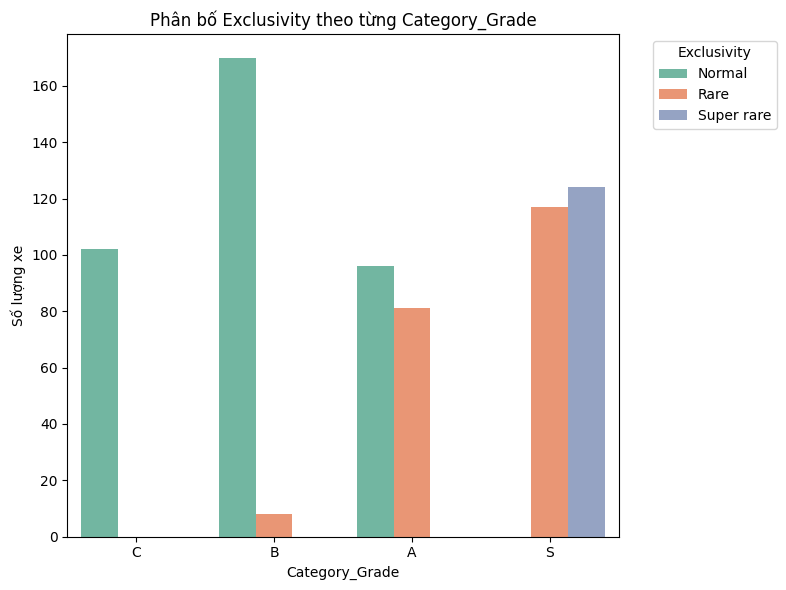

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category_Grade', hue='Exclusivity', palette='Set2')

plt.title("Phân bố Exclusivity theo từng Category_Grade")
plt.xlabel("Category_Grade")
plt.ylabel("Số lượng xe")
plt.legend(title='Exclusivity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Muốn nâng hạng xe thì nhà sản xuất ưu tiên phát triển kĩ thuật hơn là tăng độ hiếm

Giả thuyết 2:Muốn nâng giá xe thì nên tập trung nâng độ hiếm hơn là nâng thông số kỹ thuật (Dùng Spearman)

In [ ]:
print("\n=== TƯƠNG QUAN SPEARMAN: Giá bán và Thông số kỹ thuật ===")
for c in cols:
    rho, p = spearmanr(df['Price'], df[c])
    print(f"{c:<25}  rho = {rho:.3f}, p = {p:.5f}")

print("\n=== TƯƠNG QUAN SPEARMAN: Giá bán và Độ hiếm ===")
rho_price_ex, p_price_ex = spearmanr(df['Price'], df['Exclusivity_num'])
print(f"Exclusivity: rho = {rho_price_ex:.3f}, p = {p_price_ex:.5f}")



=== TƯƠNG QUAN SPEARMAN: Giá bán và Thông số kỹ thuật ===
Engine Size (L)            rho = 0.671, p = 0.00000
Horsepower                 rho = 0.869, p = 0.00000
Torque (lb-ft)             rho = 0.754, p = 0.00000
0-60 MPH Time (seconds)    rho = -0.874, p = 0.00000
Top Speed (mph)            rho = 0.906, p = 0.00000

=== TƯƠNG QUAN SPEARMAN: Giá bán và Độ hiếm ===
Exclusivity: rho = 0.905, p = 0.00000


In [ ]:
import pandas as pd
from scipy.stats import spearmanr
results = []

for c in cols:
    rho, _ = spearmanr(df['Price'], df[c], nan_policy='omit')
    results.append((c, rho))

# Thêm độ hiếm vào bảng
rho_ex, _ = spearmanr(df['Price'], df['Exclusivity_num'], nan_policy='omit')
results.append(('Exclusivity', rho_ex))

corr_table = pd.DataFrame(results, columns=['Biến', 'Hệ số tương quan (ρ)'])
print("\n=== BẢNG TƯƠNG QUAN SPEARMAN VỚI GIÁ XE ===")
print(corr_table.to_string(index=False))



=== BẢNG TƯƠNG QUAN SPEARMAN VỚI GIÁ XE ===
                   Biến  Hệ số tương quan (ρ)
        Engine Size (L)              0.670846
             Horsepower              0.869409
         Torque (lb-ft)              0.753536
0-60 MPH Time (seconds)             -0.874267
        Top Speed (mph)              0.905983
            Exclusivity              0.905267


In [ ]:
import pandas as pd
from scipy.stats import spearmanr

rho_values = []
for c in cols:
    rho, _ = spearmanr(df['Price'], df[c], nan_policy='omit')
    rho_values.append(abs(rho))  # lấy trị tuyệt đối

# Trung bình nhóm thông số kỹ thuật (|ρ|)
mean_rho_specs = sum(rho_values) / len(rho_values)

# Tương quan hạng xe - độ hiếm (|ρ|)
rho_ex, _ = spearmanr(df['Price'], df['Exclusivity_num'], nan_policy='omit')
rho_ex = abs(rho_ex)

result = pd.DataFrame({
    'Nhóm biến': ['Thông số kỹ thuật (trung bình |ρ|)', 'Độ hiếm (Exclusivity)'],
    'Hệ số tương quan (|ρ|)': [mean_rho_specs, rho_ex]
})

print("=== SO SÁNH TƯƠNG QUAN TRUNG BÌNH (TRỊ TUYỆT ĐỐI) ===")
print(result.to_string(index=False))


=== SO SÁNH TƯƠNG QUAN TRUNG BÌNH (TRỊ TUYỆT ĐỐI) ===
                         Nhóm biến  Hệ số tương quan (|ρ|)
Thông số kỹ thuật (trung bình |ρ|)                0.814808
             Độ hiếm (Exclusivity)                0.905267


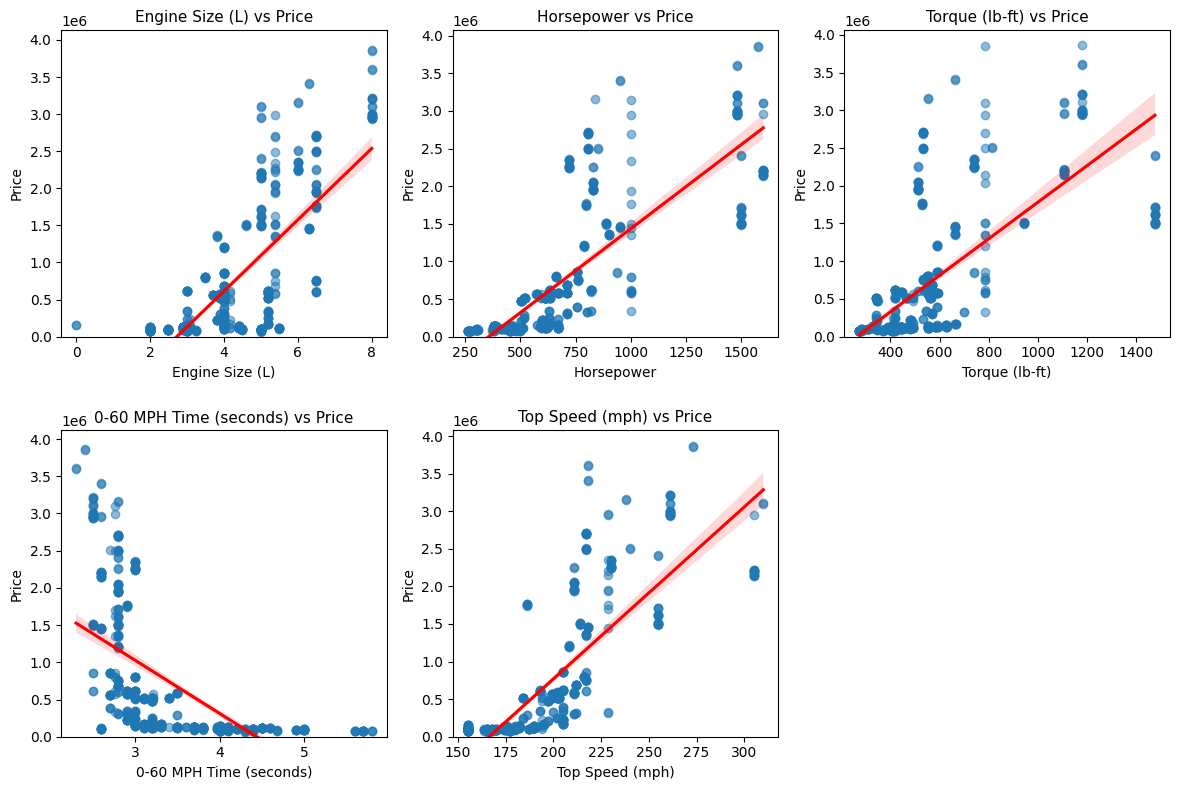

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Các biến động cơ cần phân tích
cols = ["Engine Size (L)", "Horsepower", "Torque (lb-ft)",
        "0-60 MPH Time (seconds)", "Top Speed (mph)"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=col, y="Price", data=df,
                scatter_kws={'alpha':0.5},
                line_kws={'color':'red'})
    plt.title(f"{col} vs Price", fontsize=11)
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.ylim(0)

plt.tight_layout()
plt.show()


/tmp/ipython-input-667706968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Exclusivity", y="Price", data=df, palette="muted", inner="quartile")


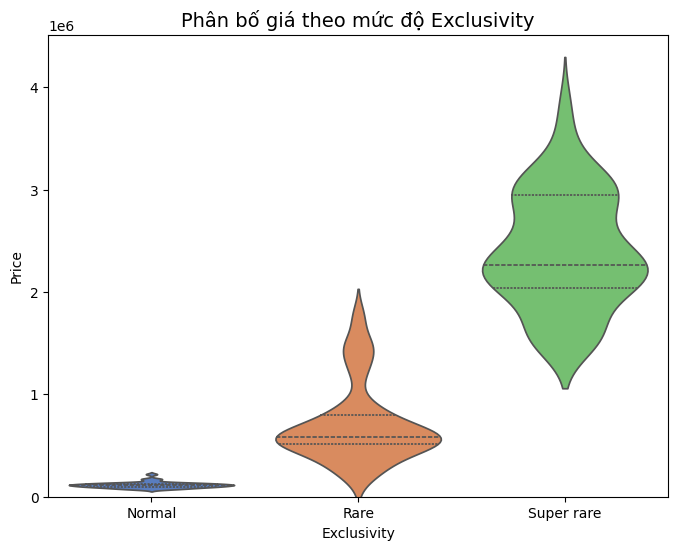

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Exclusivity", y="Price", data=df, palette="muted", inner="quartile")
plt.title("Phân bố giá theo mức độ Exclusivity", fontsize=14)
plt.xlabel("Exclusivity")
plt.ylabel("Price")
plt.ylim(0)
plt.show()


Xem sự nhạy cảm của khách hàng với từng chỉ số động cơ

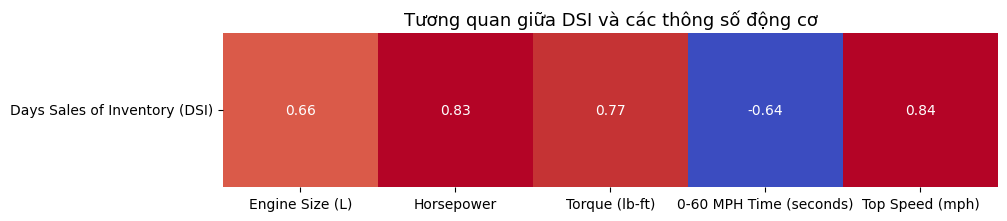

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Các biến động cơ
engine_features = ["Engine Size (L)", "Horsepower", "Torque (lb-ft)",
                   "0-60 MPH Time (seconds)", "Top Speed (mph)", "Days Sales of Inventory (DSI)"]

# Tính tương quan Pearson
corr = df[engine_features].corr(method="pearson")

corr_dsi = corr.loc[["Days Sales of Inventory (DSI)"], engine_features[:-1]]

plt.figure(figsize=(10, 2))
sns.heatmap(corr_dsi, annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Tương quan giữa DSI và các thông số động cơ", fontsize=13)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


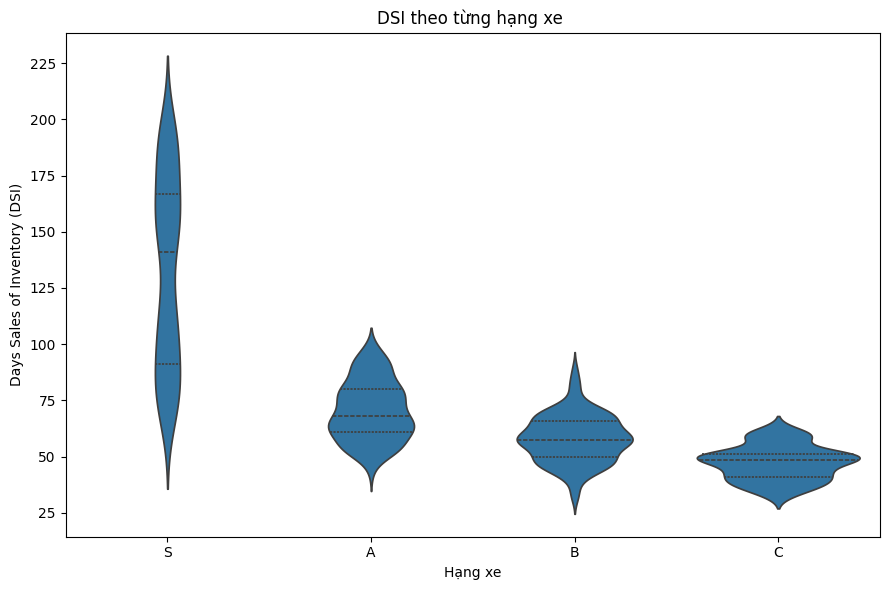

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
order = ['S', 'A', 'B', 'C']

plt.figure(figsize=(9,6))
sns.violinplot(x='Category_Grade', y='Days Sales of Inventory (DSI)', data=df, order=order, inner='quartile')
plt.title('DSI theo từng hạng xe ')
plt.xlabel('Hạng xe')
plt.ylabel('Days Sales of Inventory (DSI)')
plt.tight_layout()
plt.show()


Góc nhìn phân phối:
1. Những xe có Performance Index cao hơn thì có bán chạy hơn không ? (DSI thấp) -Lưu ý: DSI và Performance Index không có phân phối chuẩn nhưng cỡ mẫu lớn và tuyến tính với nhau nên sẽ dùng Pearson



In [ ]:
from scipy.stats import pearsonr

Kết quả kiểm định Pearson:
  Hệ số tương quan r = -0.765
  p-value = 0.0000
 => Có mối tương quan có ý nghĩa thống kê giữa Performance Index và DSI.
   (Tương quan âm: xe có Performance Index cao thì DSI thấp hơn nên bán chạy hơn)


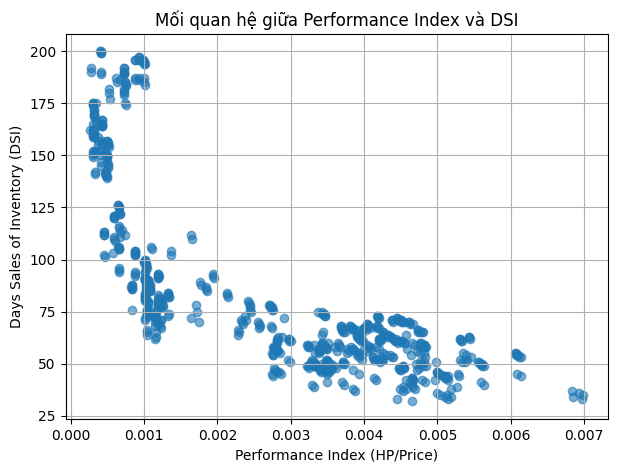

In [ ]:
x = df['Performance_Index']
y = df['Days Sales of Inventory (DSI)']

r, p_value = pearsonr(x, y)

print("Kết quả kiểm định Pearson:")
print(f"  Hệ số tương quan r = {r:.3f}")
print(f"  p-value = {p_value:.4f}")

if p_value < 0.05:
    print(" => Có mối tương quan có ý nghĩa thống kê giữa Performance Index và DSI.")
    if r < 0:
        print("   (Tương quan âm: xe có Performance Index cao thì DSI thấp hơn nên bán chạy hơn)")
    else:
        print("   (Tương quan dương: Performance Index cao đi kèm DSI cao hơn)")
else:
    print("Không có mối tương quan có ý nghĩa thống kê giữa hai biến.")
#Vẽ Scatter
plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.6)
plt.title("Mối quan hệ giữa Performance Index và DSI")
plt.xlabel("Performance Index (HP/Price)")
plt.ylabel("Days Sales of Inventory (DSI)")
plt.grid(True)
plt.show()

Giả thuyết 2: Các xe có giá càng cao thì càng khó bán. ->Insight: các nhà phân phối phải cân bằng giữa biên lợi nhuận và chi phí lưu kho đối với từng dòng xe.
So sánh tương quan giữa DSI và Price

In [ ]:
x = df['Price']
y = df['Days Sales of Inventory (DSI)']

r, p_value = pearsonr(x, y)

print("Kết quả kiểm định Pearson:")
print(f"  Hệ số tương quan r = {r:.3f}")
print(f"  p-value = {p_value:.4f}")

if p_value < 0.05:
    print(" => Có mối tương quan có ý nghĩa thống kê giữa Performance Index và DSI.")
    if r > 0:
        print("   (Tương quan dương: xe có Price cao thì DSI cao hơn nên khó bán hơn)")
    else:
        print("   (Tương quan âm: Price càng cao cao đi kèm DSI thấp hơn)")
else:
    print("Không có mối tương quan có ý nghĩa thống kê giữa hai biến.")

Kết quả kiểm định Pearson:
  Hệ số tương quan r = 0.896
  p-value = 0.0000
 => Có mối tương quan có ý nghĩa thống kê giữa Performance Index và DSI.
   (Tương quan dương: xe có Price cao thì DSI cao hơn nên khó bán hơn)


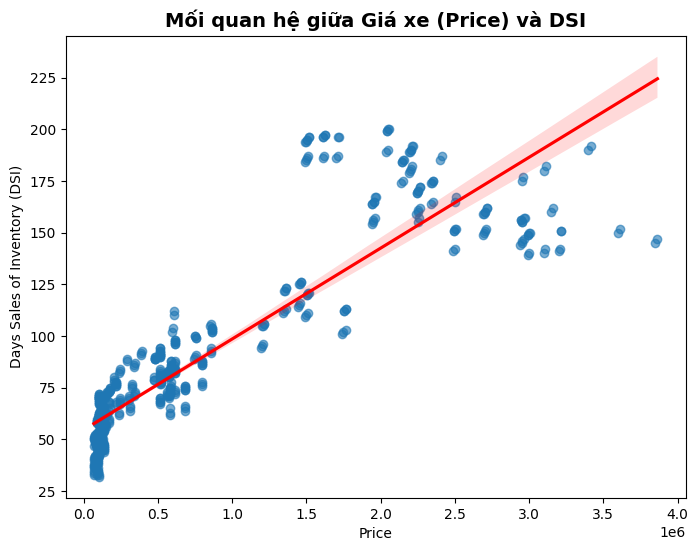

In [ ]:
# Vẽ biểu đồ scatter
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x='Price', y='Days Sales of Inventory (DSI)', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Mối quan hệ giữa Giá xe (Price) và DSI', fontsize=14, fontweight='bold')
plt.xlabel('Price')
plt.ylabel('Days Sales of Inventory (DSI)')
plt.show()


Các xe có giá càng cao (Price) thì Days Sales of Inventory (DSI) càng cao → xe càng khó bán.

Góc nhìn người tiêu dùng


Dưới góc nhìn của người tiêu dùng, có phải khi độ hiếm tăng lên thì có nghĩa là nhà sản xuất sẽ tập trung phát triển hơn về hiệu suất trên mỗi đồng (USD) chi trả không ?

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind


x = df[df['Exclusivity']=='Super rare']['Performance_Index']
y = df[df['Exclusivity']=='Rare']['Performance_Index']

tstat, p = ttest_ind(x, y, equal_var=False, alternative='less')
print("Welch t-test: t =", tstat, "p =", p)


Welch t-test: t = -16.14838639845408 p = 5.927560826205614e-43


/tmp/ipython-input-2543605584.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exclusivity", y="Performance_Index", data=df, palette="Set2")


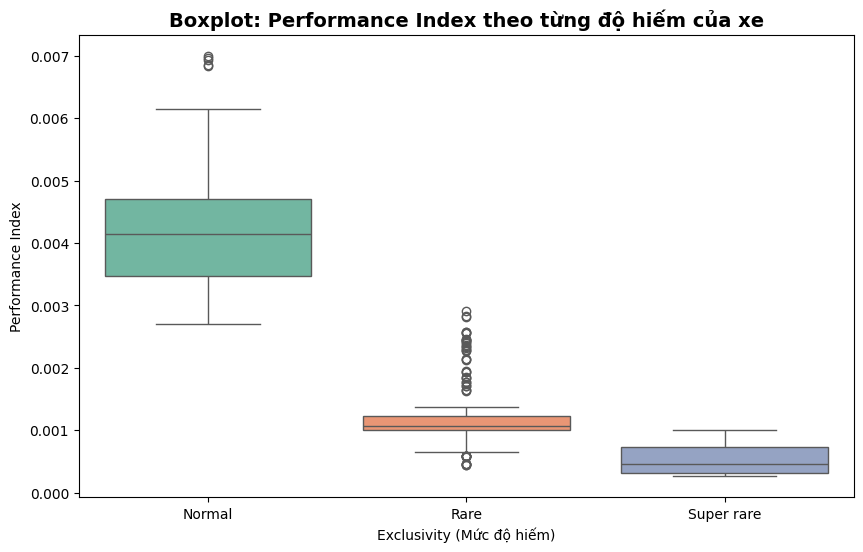

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="Exclusivity", y="Performance_Index", data=df, palette="Set2")

plt.title("Boxplot: Performance Index theo từng độ hiếm của xe", fontsize=14, fontweight="bold")
plt.xlabel("Exclusivity (Mức độ hiếm)")
plt.ylabel("Performance Index")

plt.show()


Những chiếc xe “Super rare” có xu hướng ít hiệu quả hơn về hiệu suất trên mỗi đơn giá (HP/Price) so với xe “Rare”.

Nói cách khác, chúng đắt hơn nhiều so với mức tăng hiệu
năng mà chúng mang lại


Phân tích hình

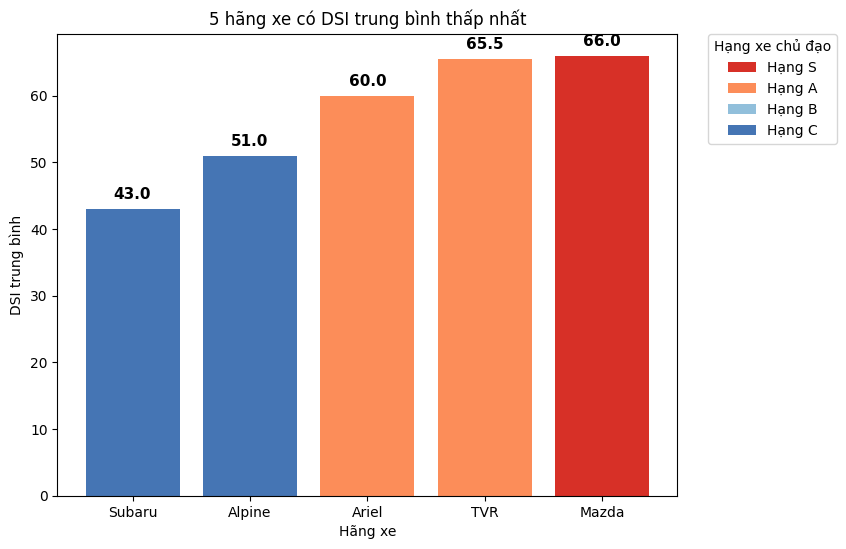

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

avg_dsi = df.groupby("Car Make").agg(
    avg_DSI=('Days Sales of Inventory (DSI)', 'mean'),
    main_grade=('Category_Grade', lambda x: x.mode()[0])  # Hạng xe chủ đạo
).reset_index()

lowest_5 = avg_dsi.nsmallest(5, 'avg_DSI')

color_map = {'S': '#d73027', 'A': '#fc8d59', 'B': '#91bfdb', 'C': '#4575b4'}
colors = lowest_5['main_grade'].map(color_map)

plt.figure(figsize=(8, 6))
bars = plt.bar(lowest_5['Car Make'], lowest_5['avg_DSI'], color=colors)
for i, v in enumerate(lowest_5['avg_DSI']):
    plt.text(i, v + 1, f"{v:.1f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("5 hãng xe có DSI trung bình thấp nhất")
plt.xlabel("Hãng xe")
plt.ylabel("DSI trung bình")

legend_elements = [Patch(facecolor=color_map[g], label=f'Hạng {g}') for g in color_map]
plt.legend(handles=legend_elements, title="Hạng xe chủ đạo",
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()


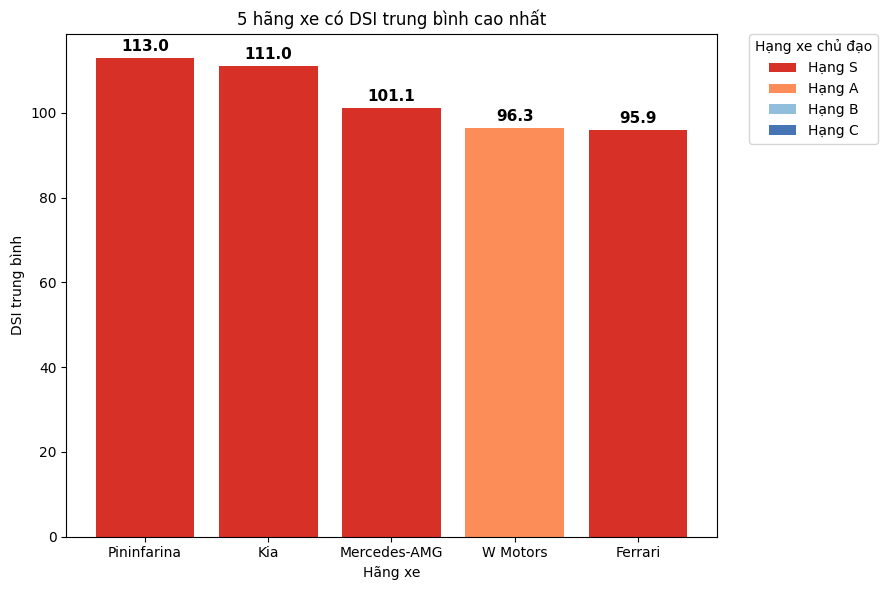

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

avg_dsi = df.groupby("Car Make").agg(
    avg_DSI=('Days Sales of Inventory (DSI)', 'mean'),
    main_grade=('Category_Grade', lambda x: x.mode()[0])
).reset_index()

highest_5 = avg_dsi.nlargest(5, 'avg_DSI')

color_map = {'S': '#d73027', 'A': '#fc8d59', 'B': '#91bfdb', 'C': '#4575b4'}
colors = highest_5['main_grade'].map(color_map)

plt.figure(figsize=(9, 6))
bars = plt.bar(highest_5['Car Make'], highest_5['avg_DSI'], color=colors)
for i, v in enumerate(highest_5['avg_DSI']):
    plt.text(i, v + 1, f"{v:.1f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("5 hãng xe có DSI trung bình cao nhất")
plt.xlabel("Hãng xe")
plt.ylabel("DSI trung bình")

legend_elements = [Patch(facecolor=color_map[g], label=f'Hạng {g}') for g in color_map]
plt.legend(handles=legend_elements, title="Hạng xe chủ đạo",
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


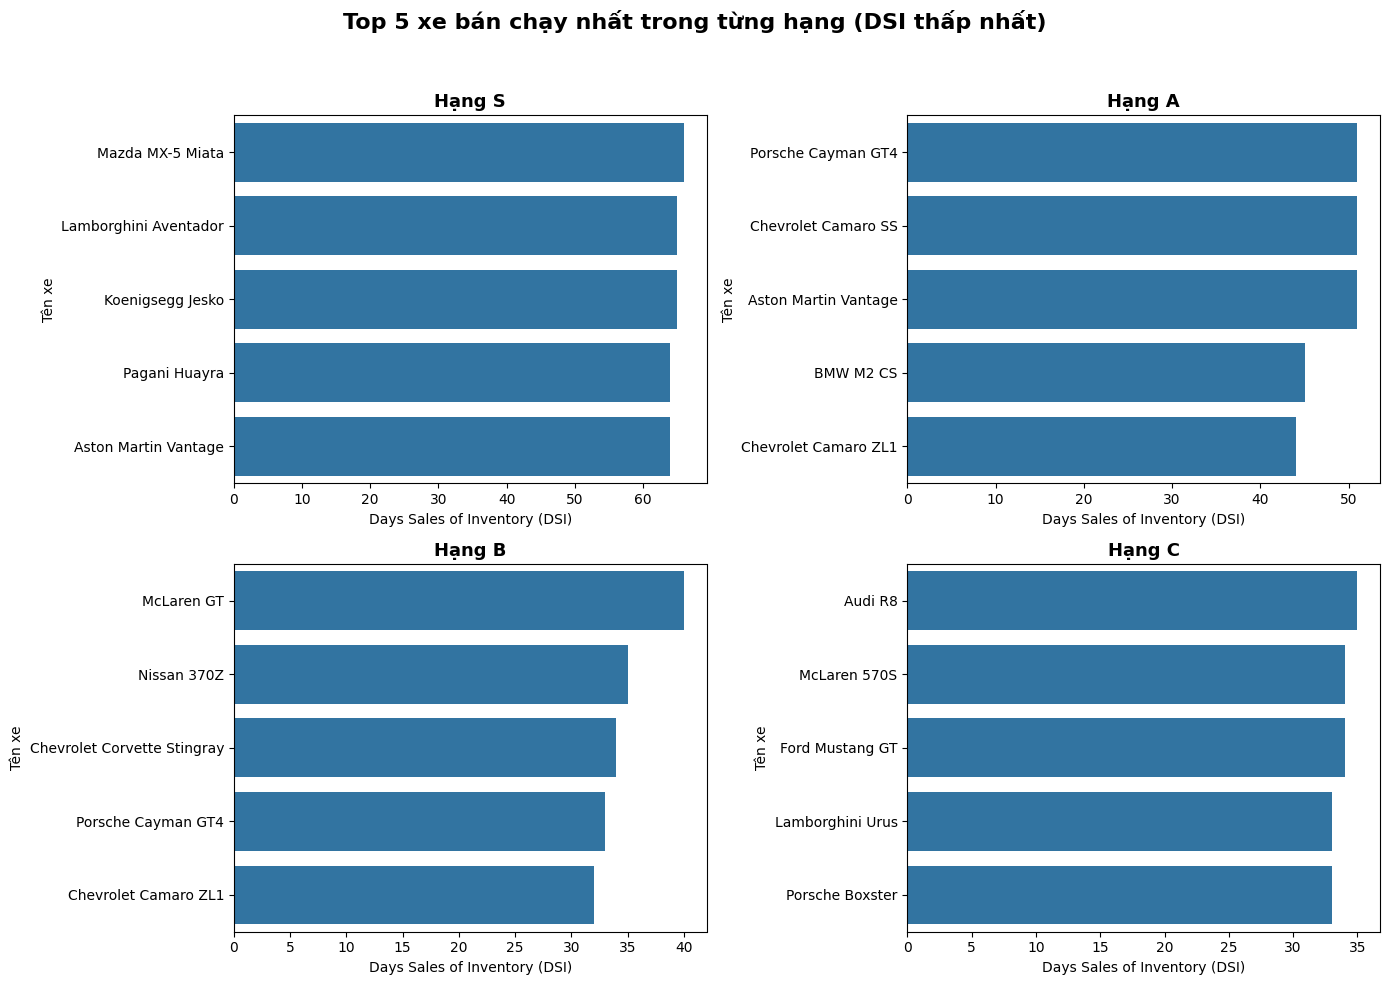

In [ ]:
# Lấy top 5 xe bán chạy nhất (DSI thấp nhất) cho từng hạng
top5 = (
    df.sort_values(by=["Category_Grade", "Days Sales of Inventory (DSI)"])
      .groupby("Category_Grade")
      .head(5)
)

# Gộp tên xe
top5["Car"] = top5["Car Make"] + " " + top5["Car Model"]

# Đảm bảo thứ tự hạng: S -> A -> B -> C
grade_order = ["S", "A", "B", "C"]
top5["Category_Grade"] = pd.Categorical(top5["Category_Grade"], categories=grade_order, ordered=True)

# Giữ lại chỉ những hạng có trong dữ liệu
categories = [g for g in grade_order if g in top5["Category_Grade"].unique()]

# Tạo figure gồm 4 vùng con (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Vẽ từng vùng cho từng hạng
for i, cat in enumerate(categories):
    ax = axes[i]
    data_cat = top5[top5["Category_Grade"] == cat]
    sns.barplot(
        data=data_cat,
        y="Car",
        x="Days Sales of Inventory (DSI)",
        ax=ax
    )
    ax.set_title(f"Hạng {cat}", fontsize=13, weight="bold")
    ax.set_xlabel("Days Sales of Inventory (DSI)")
    ax.set_ylabel("Tên xe")
    ax.invert_yaxis()

plt.suptitle("Top 5 xe bán chạy nhất trong từng hạng (DSI thấp nhất)", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

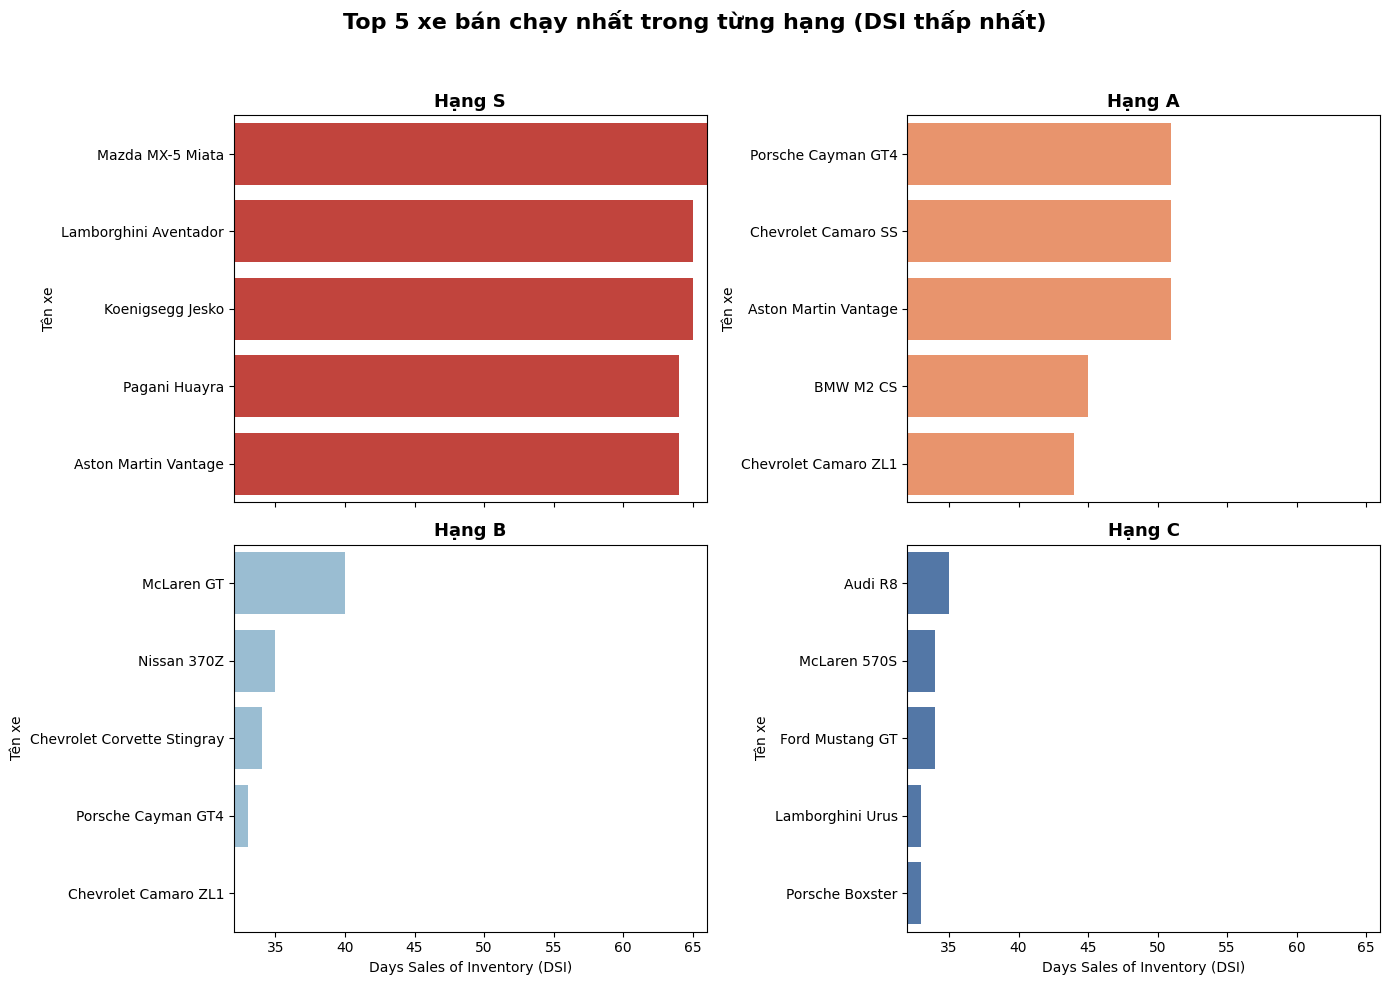

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Lấy top 5 xe bán chạy nhất (DSI thấp nhất) cho từng hạng ---
top5 = (
    df.sort_values(by=["Category_Grade", "Days Sales of Inventory (DSI)"])
      .groupby("Category_Grade")
      .head(5)
)

# --- Gộp tên xe ---
top5["Car"] = top5["Car Make"] + " " + top5["Car Model"]

# --- Đảm bảo thứ tự hạng ---
grade_order = ["S", "A", "B", "C"]
top5["Category_Grade"] = pd.Categorical(top5["Category_Grade"], categories=grade_order, ordered=True)

#Màu cho từng hạng
color_map = {'S': '#d73027', 'A': '#fc8d59', 'B': '#91bfdb', 'C': '#4575b4'}

#Giữ lại chỉ những hạng có trong dữ liệu
categories = [g for g in grade_order if g in top5["Category_Grade"].unique()]

#Tính giới hạn trục X chung
x_min = top5["Days Sales of Inventory (DSI)"].min()
x_max = top5["Days Sales of Inventory (DSI)"].max()

#Tạo figure gồm 4 vùng con (2x2), cùng thang đo X
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

# --- Vẽ từng vùng cho từng hạng ---
for i, cat in enumerate(categories):
    ax = axes[i]
    data_cat = top5[top5["Category_Grade"] == cat]
    sns.barplot(
        data=data_cat,
        y="Car",
        x="Days Sales of Inventory (DSI)",
        ax=ax,
        color=color_map[cat]
    )
    ax.set_title(f"Hạng {cat}", fontsize=13, weight="bold")
    ax.set_xlabel("Days Sales of Inventory (DSI)")
    ax.set_ylabel("Tên xe")
    ax.invert_yaxis()  # Xe bán chạy nhất (DSI nhỏ nhất) nằm trên cùng
    ax.set_xlim(x_min, x_max)  # Cùng thang đo X

# --- Xóa các subplot thừa nếu không đủ 4 hạng ---
for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

# --- Tiêu đề chung ---
plt.suptitle("Top 5 xe bán chạy nhất trong từng hạng (DSI thấp nhất)", fontsize=16, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipython-input-1879786994.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


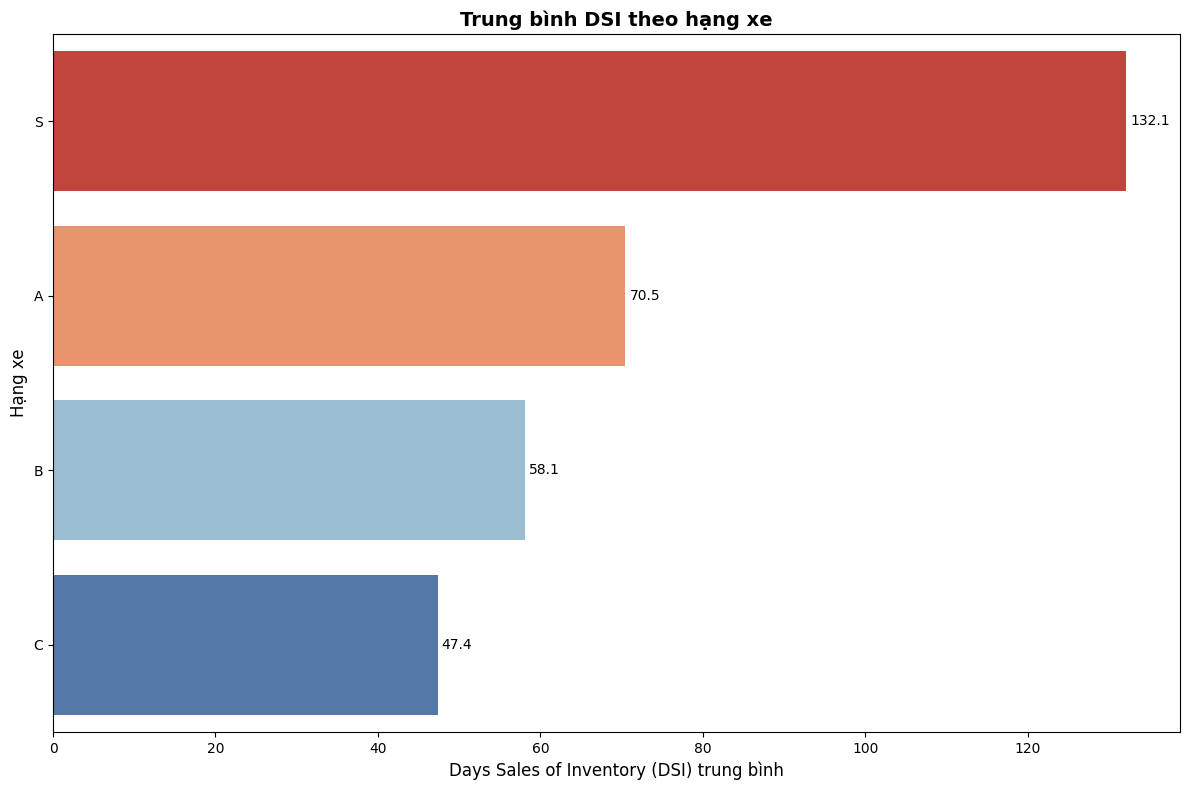

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# --- Tính trung bình DSI theo hạng xe ---
avg_dsi = (
    df.groupby("Category_Grade")["Days Sales of Inventory (DSI)"]
      .mean()
      .reset_index()
)

# --- Đặt thứ tự hạng ---
grade_order = ["S", "A", "B", "C"]
avg_dsi["Category_Grade"] = pd.Categorical(avg_dsi["Category_Grade"], categories=grade_order, ordered=True)
avg_dsi = avg_dsi.sort_values("Category_Grade", ascending=True)

# --- Bảng màu cho từng hạng ---
color_map = {'S': '#d73027', 'A': '#fc8d59', 'B': '#91bfdb', 'C': '#4575b4'}
colors = avg_dsi["Category_Grade"].map(color_map).tolist()  # ✅ chuyển sang list

# --- Vẽ biểu đồ ngang ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=avg_dsi,
    y="Category_Grade",
    x="Days Sales of Inventory (DSI)",
    palette=colors  # ✅ bây giờ là list màu hợp lệ
)

# --- Thêm nhãn giá trị trung bình ---
for index, value in enumerate(avg_dsi["Days Sales of Inventory (DSI)"]):
    plt.text(value + 0.5, index, f"{value:.1f}", va='center')

# --- Trang trí biểu đồ ---
plt.title("Trung bình DSI theo hạng xe", fontsize=14, weight="bold")
plt.xlabel("Days Sales of Inventory (DSI) trung bình", fontsize=12)
plt.ylabel("Hạng xe", fontsize=12)

# --- Legend bên ngoài ---
handles = [Patch(color=color_map[g], label=f"Hạng {g}") for g in avg_dsi["Category_Grade"].dropna().unique()]


plt.tight_layout()
plt.show()


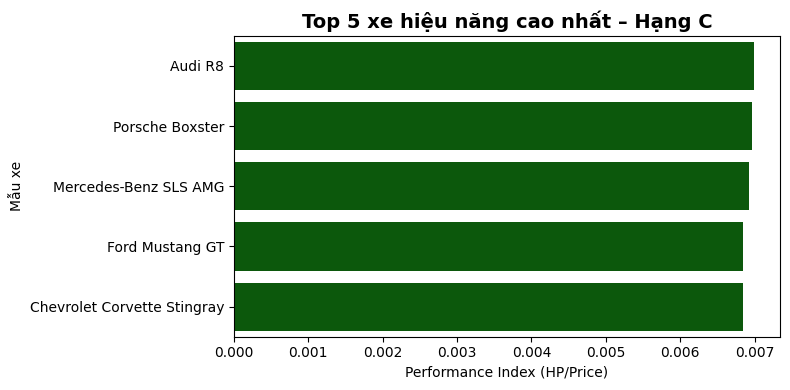

In [ ]:
cate = "C"
data_cate = (
    df[df["Category_Grade"] == cate]
      .sort_values(by="Performance_Index", ascending=False)
      .head(5)
)
data_cate["Car"] = data_cate["Car Make"] + " " + data_cate["Car Model"]

plt.figure(figsize=(8, 4))
sns.barplot(
    data=data_cate,
    y="Car",
    x="Performance_Index",
    color="DarkGreen",
    order=data_cate.sort_values("Performance_Index", ascending=True)["Car"]
)
plt.title(f"Top 5 xe hiệu năng cao nhất – Hạng {cate}", fontsize=14, weight="bold")
plt.xlabel("Performance Index (HP/Price)")
plt.ylabel("Mẫu xe")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()